In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import pycountry
import squarify
from collections import Counter
import warnings
import seaborn as sns
sns.set_style('white')
warnings.filterwarnings('ignore')
from scipy.stats import norm
pd.options.display.float_format = "{:.2f}".format
import re
import os
from matplotlib import cm
from wordcloud import WordCloud, STOPWORDS

In [2]:
kiva = pd.read_csv(r"Kiva\kiva_loans.csv")
kiva_loc = pd.read_csv(r"Kiva\kiva_mpi_region_locations.csv")

In [3]:
print('Kiva Shape: ',kiva.shape,'\n')

Kiva Shape:  (671205, 20) 



In [4]:
kiva.describe()

,id,funded_amount,loan_amount,partner_id,term_in_months,lender_count
count,671205.00,671205.00,671205.00,657698.00,671205.00,671205.00
mean,993248.59,786.00,842.40,178.20,13.74,20.59
std,196611.28,1130.40,1198.66,94.25,8.60,28.46
min,653047.00,0.00,25.00,9.00,1.00,0.00
25%,823072.00,250.00,275.00,126.00,8.00,7.00
50%,992780.00,450.00,500.00,145.00,13.00,13.00
75%,1163653.00,900.00,1000.00,204.00,14.00,24.00
max,1340339.00,100000.00,100000.00,536.00,158.00,2986.00


In [5]:
t1 = kiva.isnull().sum().sort_values(ascending=False)
p1 = (kiva.isnull().sum()/kiva.isnull().count()).sort_values(ascending=False)*100
m1 = pd.concat([t1, p1], axis=1, keys=['total_missing', '%_missing'])
m1.head()

,total_missing,%_missing
tags,171416,25.54
region,56800,8.46
funded_time,48331,7.20
partner_id,13507,2.01
use,4232,0.63


In [6]:
kiva.sample(1)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
372577,1019246,400.00,400.00,Motorcycle Transport,Transportation,to add to her savings to purchase another moto...,KE,Kenya,Mwambalazi,KES,164.00,2016-02-08 06:01:25+00:00,2016-02-08 08:00:00+00:00,2016-02-17 22:59:08+00:00,13.00,14,"user_favorite, #Parent, #Biz Durable Asset, #W...",female,irregular,2016-02-08


# Loans by Countries

In [16]:
kiva.country.value_counts().head(5)

Philippines    160441
Kenya           75825
El Salvador     39875
Cambodia        34836
Pakistan        26857
Name: country, dtype: int64

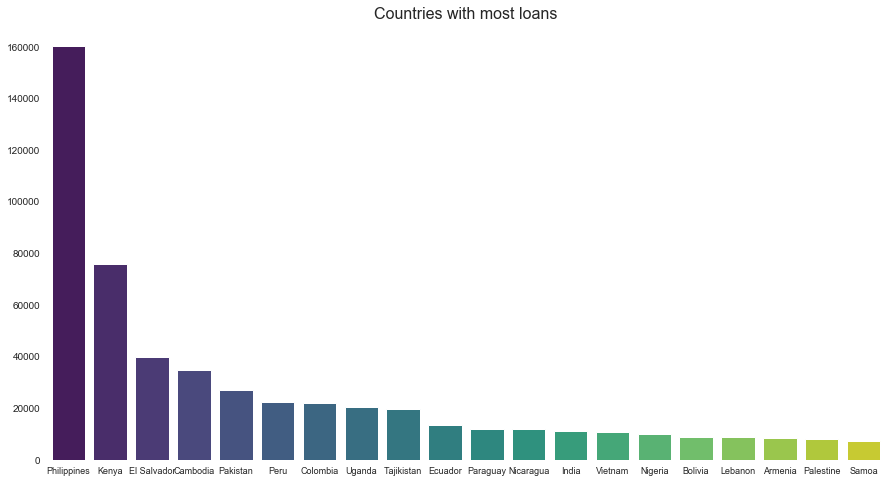

In [22]:
plt.figure(figsize=(15,8))
a=sns.barplot(x = kiva.country.value_counts().head(20).index,y=kiva.country.value_counts().head(20).values,palette='viridis')
plt.xticks(fontsize=9)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
a.set_title('Countries with most loans',fontsize=16);

In [49]:
l0 = kiva.groupby(['country'])['loan_amount'].sum().sort_values(ascending = False).head(15)
f0 = kiva.groupby(['country'])['funded_amount'].sum().sort_values(ascending = False).head(15)

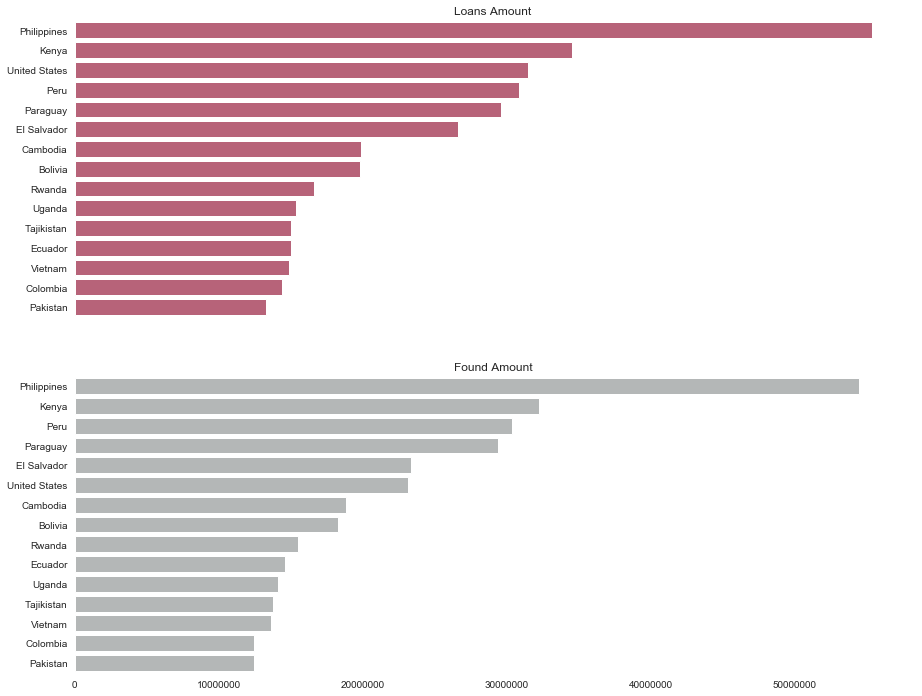

In [58]:
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
fig, ax = plt.subplots(2,1,figsize=(15,12),sharex=True)
ax1 = sns.barplot(y = l0.index,x=l0.values,ax=ax[0],palette=['#c55572'],orient='h')
sns.despine(left=True, bottom=True)
ax2 = sns.barplot(y = f0.index,x=f0.values,ax=ax[1],palette=['#b3b7b8'],orient='h')
ax1.set_title('Loans Amount')
ax2.set_title('Found Amount')
ax1.set_ylabel('')
ax1.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
plt.xlabel('')
plt.ylabel('')
sns.despine(left=True, bottom=True);

In [92]:
l0f0 = kiva.groupby(['country'])['loan_amount','funded_amount'].sum().sort_values(by='funded_amount',ascending = False).head(15).reset_index()
l0f0_tidy = l0f0.melt(id_vars='country')

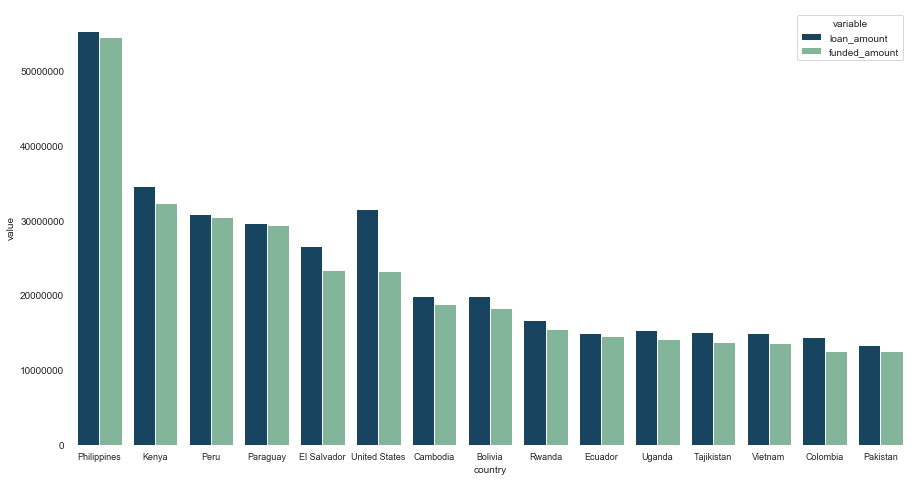

In [99]:
plt.figure(figsize=(15,8))
b = sns.barplot(y='value',x='country',hue='variable',data=l0f0_tidy,palette=['#0B486B','#79BD9A','#B5838D'])
plt.xticks(fontsize=9)
sns.despine(top=True, right=True, left=True, bottom=True, offset=None, trim=False)
b.yaxis.set_major_formatter(FormatStrFormatter('%.0f'))